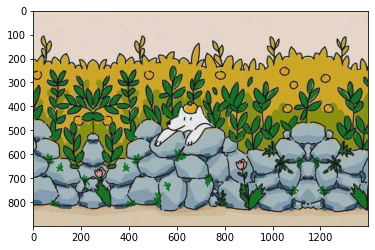

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

import math

import numpy as np
 
def get_color_channels(img):
    img = img.copy()
    channels_num = len(img.shape)
    result = []
    
    channels = np.split(img, channels_num, axis=2)
    for i in channels:
        result.append(i.sum(axis=2)) 
    return result

# img = cv2.imread('dogdog.jpg) 
img = Image.open('dogdog.jpg')
img = np.array(img)

# img.transpose(0,1,2) 
plt.imshow(img)
plt.show()

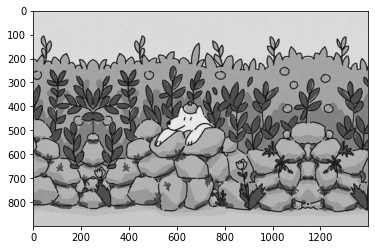

In [41]:
L = R * 299 / 1000 + G * 587 / 1000 + B * 114 / 1000  
plt.imshow(L, cmap="gray")
plt.show()

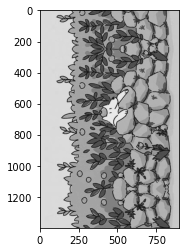

In [42]:
plt.imshow(L.T, cmap="gray")
plt.show()

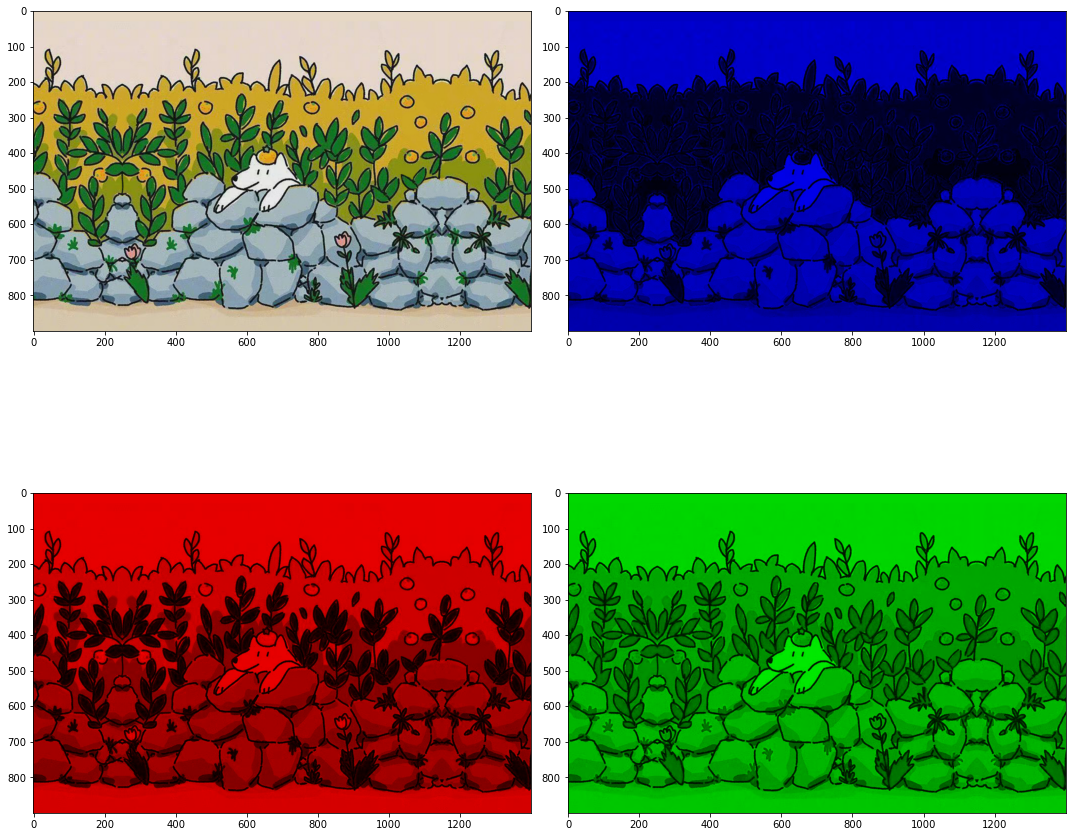

In [43]:
B_img = img.copy()
B_img[:,:, [0,1]]=0
 
R_img = img.copy()
R_img[:,:, [0,2]]=0
 
G_img = img.copy()
G_img[:,:, [2,1]]=0
 
 
fig,ax = plt.subplots(2,2)
 
ax[0,0].imshow(img)
ax[1,1].imshow(R_img)
ax[1,0].imshow(G_img)
ax[0,1].imshow(B_img)
fig.set_size_inches(15, 15)
plt.tight_layout()
plt.show()

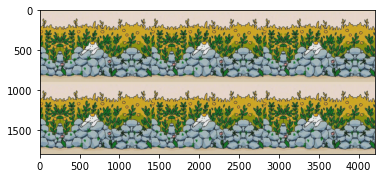

In [44]:
t1 = np.concatenate((img, img, img), axis=1) # 横向拼接
t2 = np.concatenate((t1, t1), axis=0)
 
plt.imshow(t2)
plt.show()

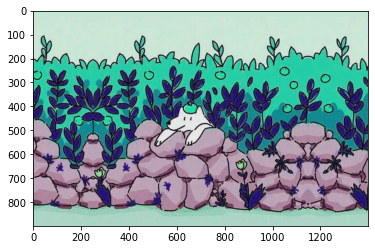

In [55]:
t = img.copy()
 
plt.imshow(t[:,:,[2,0,1]])
plt.show()

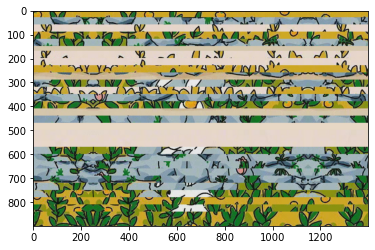

In [49]:
t = img.copy()
height=t.shape[0]
 
li = np.split(t, range(100, height, 30), axis=0)
np.random.shuffle(li)
t = np.concatenate(li, axis=0)
plt.imshow(t)
plt.show()

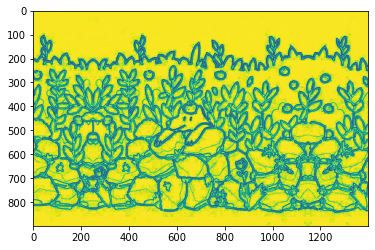

In [54]:
draw = np.asarray(Image.open('dogdog.jpg').convert('L')).astype('float')

depth = 10. 
grad = np.gradient(draw)
grad_x, grad_y = grad  
grad_x = grad_x * depth / 100.
grad_y = grad_y * depth / 100.
A = np.sqrt(grad_x **2 + grad_y **2 + 1.)
uni_x = grad_x / A 
uni_y = grad_y / A  
uni_z = 1. / A  

vec_el = np.pi / 2.2  
vec_az = np.pi / 4.  
dx = np.cos(vec_el) * np.cos(vec_az)
dy = np.cos(vec_el) * np.sin(vec_az)
dz = np.sin(vec_el)

b = 255 * (dx * uni_x + dy * uni_y + dz * uni_z)
b = b.clip(0,255)

im = Image.fromarray(b.astype('uint8')) 
plt.imshow(im)
plt.show()